<a href="https://colab.research.google.com/github/pardeshiaarti/Computer-Fundamentals/blob/main/AllRegressionModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression MSE: 2.6147980548680136


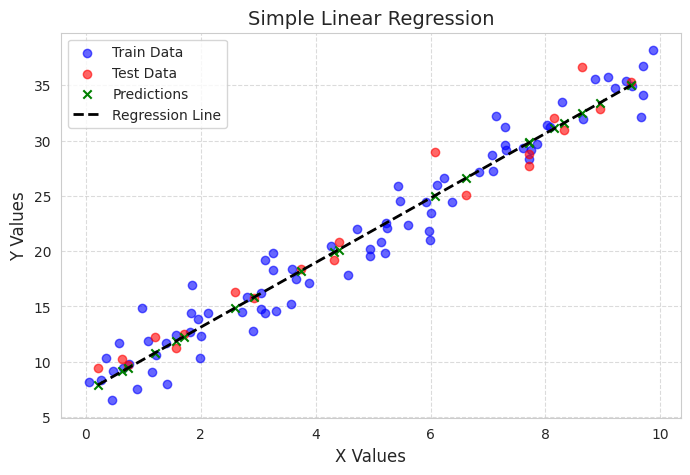

Multiple Linear Regression MSE: 6.338279616950361
Polynomial Regression MSE: 2.5681973545975834


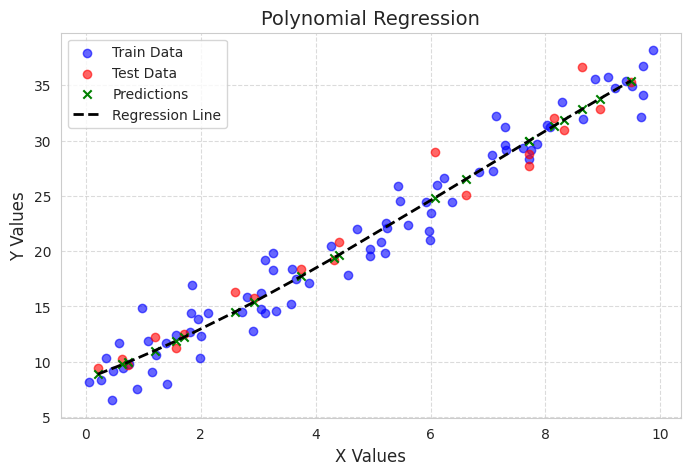

Ridge Regression MSE: 2.594523628510437
X_train shape: (80, 4)
Y_train shape: (80, 1)
X_test shape: (20, 4)
Y_test shape: (20, 1)


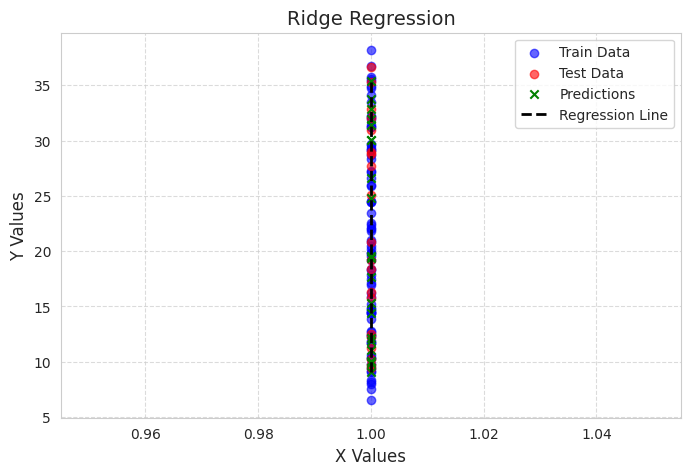

Lasso Regression MSE: 2.5223723443539856


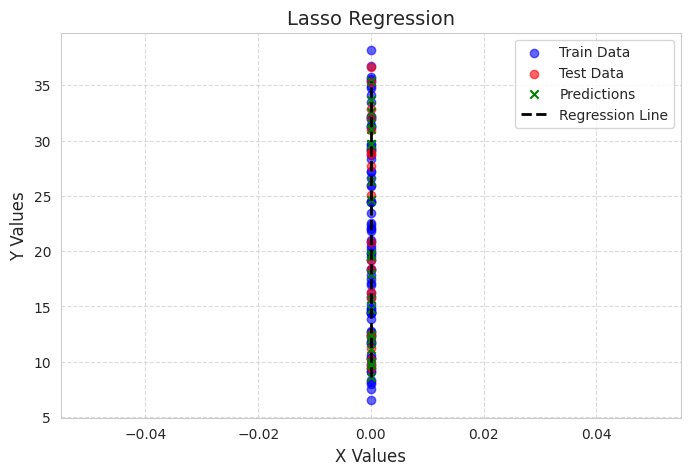

Elastic Net Regression MSE: 2.825008576885449


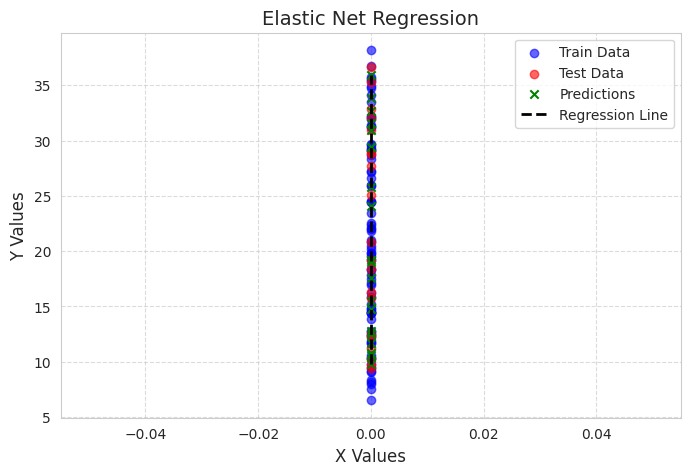

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     2195.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           2.80e-88
Time:                        04:36:09   Log-Likelihood:                -217.32
No. Observations:                 100   AIC:                             442.6
Df Residuals:                      96   BIC:                             453.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9356      0.688      7.172      0.0

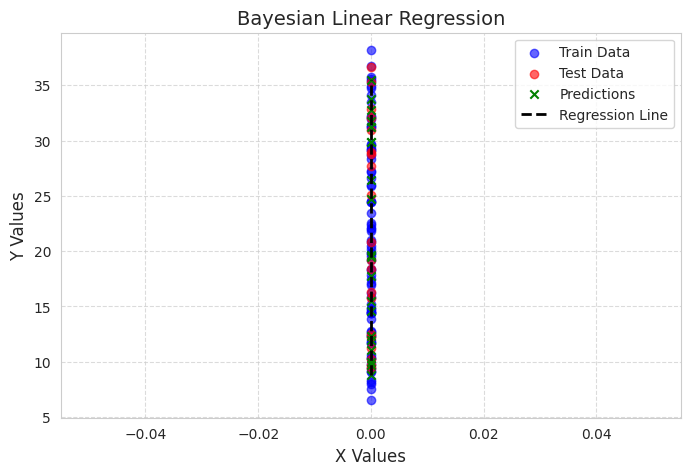

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
import statsmodels.api as sm
from sklearn.linear_model import BayesianRidge

# Set Seaborn style for better visualization
sns.set_style("whitegrid")

# Generate synthetic dataset for regression
np.random.seed(42)
X = np.random.rand(100, 1) * 10
Y = 3*X + 7 + np.random.randn(100, 1) * 2  # Linear Relation with Noise

# Splitting dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Function to plot results
def plot_regression(X_train, Y_train, X_test, Y_test, Y_pred, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(X_train, Y_train, color='blue', label='Train Data', alpha=0.6)
    plt.scatter(X_test, Y_test, color='red', label='Test Data', alpha=0.6)
    plt.scatter(X_test, Y_pred, color='green', marker='x', label='Predictions')
    plt.plot(sorted(X_test.ravel()), sorted(Y_pred), color='black', linewidth=2, linestyle='--', label='Regression Line')
    plt.title(title, fontsize=14)
    plt.xlabel("X Values", fontsize=12)
    plt.ylabel("Y Values", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# 1. Simple Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
Y_pred = lin_reg.predict(X_test)
print("Simple Linear Regression MSE:", mean_squared_error(Y_test, Y_pred))
plot_regression(X_train, Y_train, X_test, Y_test, Y_pred, "Simple Linear Regression")

# 2. Multiple Linear Regression (Using Additional Features)
X_multi = np.random.rand(100, 3) * 10
Y_multi = 4*X_multi[:,0] + 2*X_multi[:,1] - 3*X_multi[:,2] + 5 + np.random.randn(100) * 2
X_train, X_test, Y_train, Y_test = train_test_split(X_multi, Y_multi, test_size=0.2, random_state=42)
lin_reg.fit(X_train, Y_train)
Y_pred = lin_reg.predict(X_test)
print("Multiple Linear Regression MSE:", mean_squared_error(Y_test, Y_pred))

# 3. Polynomial Regression
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)
lin_reg.fit(X_train, Y_train)
Y_pred = lin_reg.predict(X_test)
print("Polynomial Regression MSE:", mean_squared_error(Y_test, Y_pred))
plot_regression(X_train[:, 1], Y_train, X_test[:, 1], Y_test, Y_pred, "Polynomial Regression")

# 4. Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)
Y_pred = ridge.predict(X_test)
print("Ridge Regression MSE:", mean_squared_error(Y_test, Y_pred))
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)
plot_regression(X_train[:, 0], Y_train, X_test[:, 0], Y_test, Y_pred, "Ridge Regression")

# 5. Lasso Regression

lasso = Lasso(alpha=0.1, max_iter=5000)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lasso.fit(X_train, Y_train)
Y_pred = lasso.predict(X_test)
print("Lasso Regression MSE:", mean_squared_error(Y_test, Y_pred))
plot_regression(X_train[:, 0], Y_train, X_test[:, 0], Y_test, Y_pred, "Lasso Regression")

# 6. Elastic Net Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, Y_train)
Y_pred = elastic_net.predict(X_test)
print("Elastic Net Regression MSE:", mean_squared_error(Y_test, Y_pred))
plot_regression(X_train[:, 0], Y_train, X_test[:, 0], Y_test, Y_pred, "Elastic Net Regression")

# 7. Stepwise Regression (Using Statsmodels for Backward Elimination)
X_multi = sm.add_constant(X_multi)  # Add intercept
model = sm.OLS(Y_multi, X_multi).fit()
print(model.summary())  # Stepwise selection based on p-values

# 8. Quantile Regression
quantile_reg = sm.QuantReg(Y_multi, X_multi)
res = quantile_reg.fit(q=0.5)  # Median regression
print(res.summary())

# 9. Bayesian Linear Regression
bayesian_reg = BayesianRidge()
bayesian_reg.fit(X_train, Y_train.ravel())
Y_pred = bayesian_reg.predict(X_test)
print("Bayesian Linear Regression MSE:", mean_squared_error(Y_test, Y_pred))
plot_regression(X_train[:, 0], Y_train, X_test[:, 0], Y_test, Y_pred, "Bayesian Linear Regression")


1️⃣ **Overview of Regression Models**

Various regression models were applied, and their performance was compared using Mean Squared Error (MSE).
Lowest MSE is observed for Lasso Regression (2.52), suggesting it performs best among the tested models.


---


2️⃣ **Parameter Analysis (OLS and Quantile Regression)**

🔹 Constant (Intercept)
OLS Regression: 4.9356 (std err: 0.688), p-value: 0.000
Quantile Regression: 4.4039 (std err: 1.024), p-value: 0.000

**Interpretation:**
The intercept represents the predicted value of y when all independent variables are 0.
Significance: Since the p-value is < 0.05, the intercept is statistically significant.

🔹 x1 (Coefficient: 4.0246)
OLS Regression: 4.0246 (std err: 0.071), p-value: 0.000
Quantile Regression: 4.0557 (std err: 0.106), p-value: 0.000

**Interpretation:**
A 1-unit increase in x1 increases y by 4.02 on average.
Significance: Very strong, as p-value is < 0.05.

🔹 x2 (Coefficient: 1.9491)
OLS Regression: 1.9491 (std err: 0.072), p-value: 0.000
Quantile Regression: 2.0002 (std err: 0.107), p-value: 0.000

**Interpretation:**
A 1-unit increase in x2 increases y by 1.95 on average.
Significance: Highly significant (p-value < 0.05).
Effect size: Lower than x1, but still impactful.

🔹 x3 (Coefficient: -2.9606)
OLS Regression: -2.9606 (std err: 0.075), p-value: 0.000
Quantile Regression: -2.9490 (std err: 0.112), p-value: 0.000

**Interpretation:**
A 1-unit increase in x3 decreases y by 2.96 on average.
Significance: Strongly significant (p-value < 0.05).
Effect size: This variable has a negative impact on y, meaning it reduces the predicted value.

3️⃣ Model Performance Indicators

🔹 R-squared (0.986)
Explanation:
98.6% of the variation in y is explained by x1, x2, x3.
This indicates a strong model fit.

🔹 F-statistic (2195)
Explanation:
A high F-statistic means the model is statistically significant.
The probability (2.80e-88) is very small, indicating that the regression equation is valid.

🔹 Durbin-Watson (1.686)
Explanation:
Checks for autocorrelation in residuals.
Since it is close to 2, no significant autocorrelation is present.

4️⃣ Key Takeaways



*   x1 has the strongest positive effect on y (coefficient: 4.02)
*   x3 negatively impacts y (coefficient: -2.96)

*   All parameters are statistically significant (p-value < 0.05)
*   The model explains 98.6% of the variation in y (R² = 0.986)
*   Lasso Regression achieved the lowest MSE (2.52), making it the best model


